# Daily / Monthly sales Trend Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("sales_backup_2.csv")
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount  TotalAmount  DiscountAmount  NetAmount
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0        60000          3000.0    57000.0
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       0.0         2000             0.0     2000.0
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0        15000             0.0    15000.0
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0        15000           750.0    14250.0
6     1007        Meena    Lalitpur       Phone  Electronics         1  30000      50.0        30000    

In [5]:


df["Date"] = pd.date_range(start="2024-01-01", periods=len(df), freq="D")



In [6]:
df.head()

,OrderID,CustomerName,City,Product,Category,Quantity,Price,Discount,TotalAmount,DiscountAmount,NetAmount,Date
0,1001,Anish,Kathmandu,Laptop,Electronics,1,80000,10.0,80000,8000.0,72000.0,2024-01-01
1,1002,Riya,Pokhara,Phone,Electronics,2,30000,5.0,60000,3000.0,57000.0,2024-01-02
2,1003,Suman,Kathmandu,Headphones,Electronics,1,2000,0.0,2000,0.0,2000.0,2024-01-03
3,1004,Anish,Kathmandu,Laptop,Electronics,1,80000,10.0,80000,8000.0,72000.0,2024-01-04
4,1005,Kiran,Biratnagar,Chair,Furniture,3,5000,0.0,15000,0.0,15000.0,2024-01-05


In [ ]:
#Converting the date column 
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

OrderID                    int64
CustomerName              object
City                      object
Product                   object
Category                  object
Quantity                   int64
Price                      int64
Discount                 float64
TotalAmount                int64
DiscountAmount           float64
NetAmount                float64
Date              datetime64[ns]
dtype: object

Text(0, 0.5, 'NetAmount')

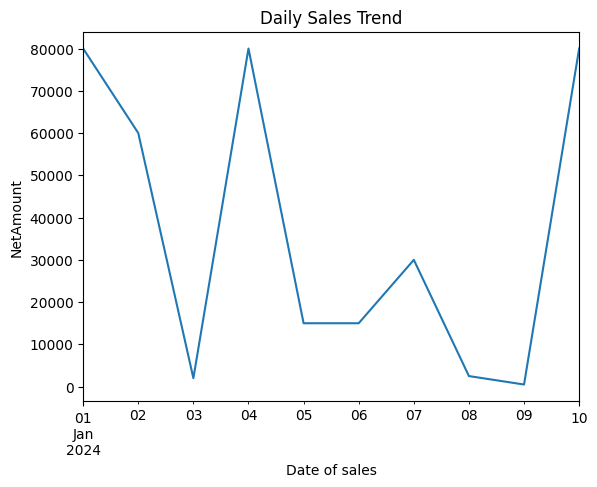

In [21]:
#Group by date 
#Line chart (Trend Chart)
daily_sales = df.groupby("Date")["TotalAmount"].sum()
daily_sales.plot(kind="line")
plt.title("Daily Sales Trend")
plt.xlabel("Date of sales")
plt.ylabel("NetAmount")


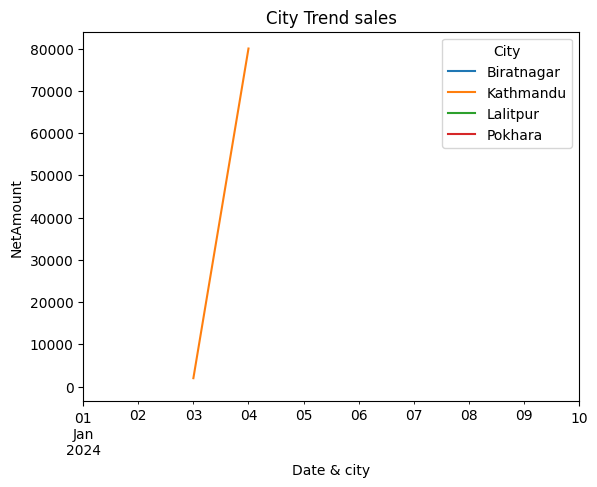

In [22]:
city_trend = df.groupby(["Date","City"])["TotalAmount"].sum().unstack()

city_trend.plot()
plt.title("City Trend sales")
plt.xlabel("Date & city")
plt.ylabel("NetAmount")
plt.show()


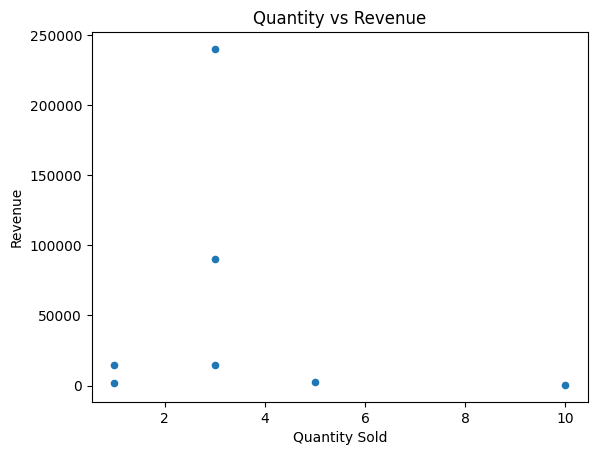

In [25]:
product_summary = df.groupby("Product").agg({
          "Quantity":"sum",
          "TotalAmount":"sum"
})
#scatter plot 
product_summary.plot(kind="scatter",x="Quantity",y="TotalAmount")
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity Sold")
plt.ylabel("Revenue")
plt.show()

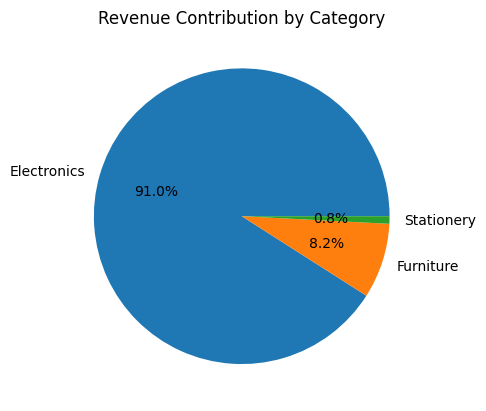

In [29]:
#Category Contribution 
category_sales =df.groupby("Category")["TotalAmount"].sum()
category_sales.plot(kind="pie",autopct="%1.1f%%")

plt.title("Revenue Contribution by Category")
plt.ylabel("")
plt.show()


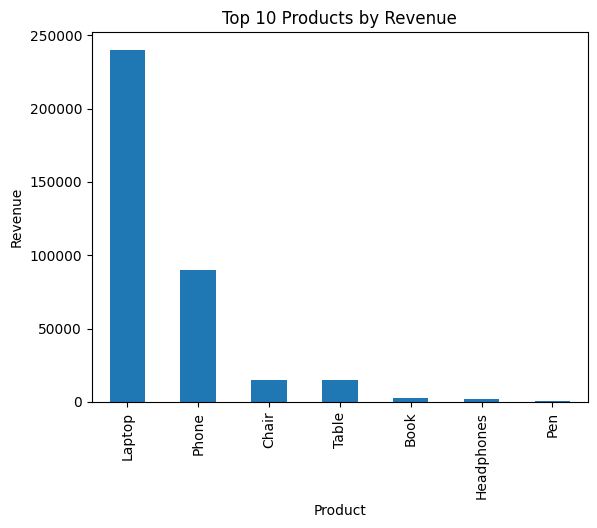

In [31]:
top_products = df.groupby("Product")["TotalAmount"].sum().sort_values(ascending=False)

top_products.plot(kind="bar")

plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()
